## Stage 1: Install dependencies and setting up GPU environment

In [32]:
!echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   130k      0 --:--:-- --:--:-- --:--:--  130k
OK


In [33]:
!apt-get update & apt-get install tensorflow-model-server

Hit:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:9 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Building dependency tree  

In [1]:
!apt-get remove tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  tensorflow-model-server
0 upgraded, 0 newly installed, 1 to remove and 5 not upgraded.
After this operation, 0 B of additional disk space will be used.
(Reading database ... 131014 files and directories currently installed.)
Removing tensorflow-model-server (1.14.0) ...


In [2]:


! echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0    99k      0 --:--:-- --:--:-- --:--:--   99k
OK


In [3]:
! apt-get update && apt-get install tensorflow-model-server

Hit:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... D

In [4]:
! apt-get upgrade tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tensorflow-model-server is already the newest version (1.14.0).
Calculating upgrade... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following packages have been kept back:
  libcudnn7 libcudnn7-dev libnccl-dev libnccl2 r-cran-devtools
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [5]:
!pip install tensorflow-gpu==1.14

In [6]:
!pip install requests

## Stage 2: Import project dependencies

In [7]:
import os
import json
import random
import requests
import subprocess
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'1.14.0'

## Stage 3: Dataset preprocessing

### Loading the dataset

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Image normalization

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
X_train.shape

(50000, 32, 32, 3)

## Stage 4: Defining the model

NOTE: We are using the model from the Section for Convolutional neural networks

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

W0718 09:00:59.461357 139669360801664 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Compiling the model

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

### Training the model

In [14]:
model.fit(X_train, 
          y_train, 
          batch_size=128, 
          epochs=10)

Epoch 1/10
50000/50000 [==============================] - 11s 214us/sample - loss: 1.4630 - sparse_categorical_accuracy: 0.4716
Epoch 2/10
50000/50000 [==============================] - 9s 189us/sample - loss: 1.0317 - sparse_categorical_accuracy: 0.6347
Epoch 3/10
50000/50000 [==============================] - 9s 188us/sample - loss: 0.8590 - sparse_categorical_accuracy: 0.7002
Epoch 4/10
50000/50000 [==============================] - 10s 191us/sample - loss: 0.7352 - sparse_categorical_accuracy: 0.7431
Epoch 5/10
50000/50000 [==============================] - 9s 188us/sample - loss: 0.6341 - sparse_categorical_accuracy: 0.7790
Epoch 6/10
50000/50000 [==============================] - 9s 188us/sample - loss: 0.5483 - sparse_categorical_accuracy: 0.8085
Epoch 7/10
50000/50000 [==============================] - 9s 189us/sample - loss: 0.4611 - sparse_categorical_accuracy: 0.8390
Epoch 8/10
50000/50000 [==============================] - 9s 188us/sample - loss: 0.3869 - sparse_categorical

### Model evaluation

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 177us/sample - loss: 0.9892 - sparse_categorical_accuracy: 0.7303


In [16]:
print("Test accuracy is {}".format(test_accuracy))

Test accuracy is 0.7303000092506409


## Stage 5: Saving the model for production

### Creating the directory for the model

In [0]:
MODEL_DIR = "model/"
version = 1

In [18]:
export_path = os.path.join(MODEL_DIR, str(version))
export_path

'model/1'

In [0]:
if os.path.isdir(export_path):
    !rm -r {export_path}

### Saving the model for the TensorFlow Serving

In [20]:
tf.saved_model.simple_save(tf.keras.backend.get_session(), export_dir=export_path, inputs={"input_image":model.input}, outputs={t.name:t for t in model.outputs})

W0718 09:03:10.441000 139669360801664 deprecation.py:323] From <ipython-input-20-f70a5d463003>:1: simple_save (from tensorflow.python.saved_model.simple_save) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.
W0718 09:03:10.446579 139669360801664 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/saved_model/signature_def_utils_impl.py:201: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


## Stage 6: Setting up the production environment

### Exporting the MODEL_DIR to environment variables

In [0]:
os.environ['MODEL_DIR'] = os.path.abspath(MODEL_DIR)

### Running the TensorFlow Serving REST API

In [22]:
%%bash --bg
nohup tensorflow_model_server --rest_api_port=8501 --model_name=cifar10 --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [23]:
!tail server.log

2019-07-18 09:03:27.756219: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:31] Reading SavedModel from: /content/model/1
2019-07-18 09:03:27.758531: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:54] Reading meta graph with tags { serve }
2019-07-18 09:03:27.760649: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-07-18 09:03:27.776644: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:202] Restoring SavedModel bundle.
2019-07-18 09:03:27.807779: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:311] SavedModel load for tags { serve }; Status: success. Took 51552 microseconds.
2019-07-18 09:03:27.807835: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:103] No warmup data file found at /content/model/1/assets.extra/tf_serving_warmup_requests
2019-07-18 09:03:27.807940: I tensorflow_serving/core

## Stage 7: Creating the first POST request

In [46]:
random_image = np.random.randint(0, len(X_test))
random_image

8

### Creating the JSON data object

In [0]:
data = json.dumps({"signature_name":"serving_default", "instances":[X_test[random_image].tolist()]})

In [48]:
data

'{"signature_name": "serving_default", "instances": [[[[0.09019607843137255, 0.07450980392156863, 0.09019607843137255], [0.07450980392156863, 0.08235294117647059, 0.10980392156862745], [0.08235294117647059, 0.06274509803921569, 0.07450980392156863], [0.2549019607843137, 0.1843137254901961, 0.1568627450980392], [0.6431372549019608, 0.5137254901960784, 0.44313725490196076], [0.7372549019607844, 0.5764705882352941, 0.45098039215686275], [0.7176470588235294, 0.5764705882352941, 0.42745098039215684], [0.6980392156862745, 0.5568627450980392, 0.4549019607843137], [0.6666666666666666, 0.5294117647058824, 0.44313725490196076], [0.6745098039215687, 0.5372549019607843, 0.403921568627451], [0.7294117647058823, 0.5647058823529412, 0.41568627450980394], [0.7294117647058823, 0.5568627450980392, 0.4117647058823529], [0.7215686274509804, 0.5529411764705883, 0.4117647058823529], [0.7176470588235294, 0.5490196078431373, 0.4117647058823529], [0.7137254901960784, 0.5490196078431373, 0.4117647058823529], [0

### Sending the first POST request to the model

In [0]:
headers = {"content-type":"application/json"}

In [0]:
# models name - cifar10 
# 
json_response = requests.post(url="http://localhost:8501/v1/models/cifar10:predict", data=data, headers=headers)

In [51]:
json_response

<Response [200]>

In [0]:
predictions = json.loads(json_response.text)['predictions']

In [53]:
predictions

[[8.17818e-06,
  7.08552605e-10,
  0.00158579159,
  0.98218,
  0.00616133446,
  0.0070982459,
  0.00113742647,
  0.00182761857,
  1.22550443e-06,
  1.96120169e-07]]

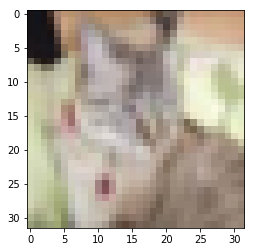

In [54]:
plt.imshow(X_test[random_image])

In [55]:
class_names[np.argmax(predictions[0])]

'cat'

## Stage 8: Sending the POST request to a specific model

In [0]:
specific_json_response = requests.post(url="http://localhost:8501/v1/models/cifar10/versions/1:predict", data=data, headers=headers)

In [35]:
specific_json_response

<Response [200]>